In [ ]:
# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [43]:
# 2. Loading dataset and Data Preprocessing

In [2]:
df=pd.read_csv(r"C:/Users/KIIT/Documents/RedWinedata.csv")


In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
df.shape #Rows and Columns

(1599, 12)

In [5]:
df.isnull().sum() #Checking for NULL Values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
# 2.1 Looking at those features which affect wine quality the most

In [6]:
df.corr() #Correlation Matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [7]:
corr=df.corr()
corr_target=abs(corr['quality'])
relevant_features=corr_target[corr_target>0.2] #Setting threshold as 0.2
relevant_features #Finding out which of the features affect the quality of wine the most

volatile acidity    0.390558
citric acid         0.226373
sulphates           0.251397
alcohol             0.476166
quality             1.000000
Name: quality, dtype: float64

In [8]:
df['quality'].value_counts() #Different types/categories of wine present in the dataset

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

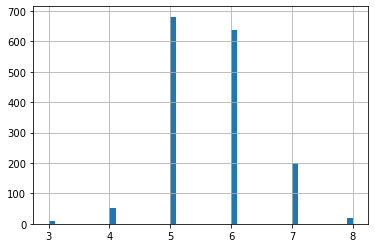

In [9]:
df['quality'].hist(bins=50)

In [44]:
# 2.2 Dataset is categorized to bad and good quality of wine by labelling them 0 and 1

In [10]:
x=df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
'pH', 'sulphates', 'alcohol']].copy()
#Splitting into x and y data

In [11]:
y=df['quality']
y=(y>5.5)
mapping = {True:1,
           False:0}
df['quality_map']=y.map(mapping)
y=df['quality_map']
#category 3 to 5.5 is taken as poor quality of wine
#category 5.5 to 8 is taken as good quality of wine 

In [12]:
df['quality_map'].value_counts() 
#Poor Quality labeled as 0
#Good Quality labeled as 1

1    855
0    744
Name: quality_map, dtype: int64

In [13]:
df.shape
#New independent variable "quality_map" consists of labelled 0's and 1's representing wine quality (taken as y variable)

(1599, 13)

In [14]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_map
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [ ]:
# 2.3 Scaling of data

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [45]:
# Now that data is categorized to two broad classes of quality of wine we now train our model
# 3. Model training using Support Vector Machine Classifier (SVC) under Support Vector Machines (SVM)


In [16]:
from sklearn import svm
svcclf = svm.SVC(C=3, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

svcclf.fit(x_train,y_train)

SVC(C=3, kernel='linear', random_state=42)

In [17]:
## Classification Report for train and test performance
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.metrics import precision_score

def print_score(svcclf,x_train,x_test,y_train,y_test,train=True):
    lb=preprocessing.LabelBinarizer()
    lb.fit_transform(y_train)
    lb.transform(y_test)
    
    ##predicting x on y. reflected on y
    if train:
        '''
        training performance
        '''
        res = svcclf.predict(x_train)
        print("Train Result:\n")
        print("Accuracy Score: {0:.4f}\n".format(accuracy_score(y_train,res)))
        print("Classification Report:\n{}\n".format(classification_report(y_train,res)))
        print("Confusion Matrix:\n{}\n".format(confusion_matrix(y_train,res)))
        print("ROC_AUC_Score:{0:4f}\n".format(roc_auc_score(lb.transform(y_train),lb.transform(res))))
              
        res = cross_val_score(svcclf,x_train,y_train,cv=10,scoring='accuracy')
        print("Average Accuracy:\t{0:4f}".format(np.mean(res)))
        print("Accuracy SD:\t\t{0:4f}".format(np.std(res)))
              
    elif train==False:
        '''
        '''
        res_test = svcclf.predict(x_test)
        print("Test Result:\n")
        print("Accuracy Score: {0:.4f}\n".format(accuracy_score(y_test,res_test)))
        print("Classification Report:\n{}\n".format(classification_report(y_test,res_test)))
        print("Confusion Matrix:\n{}\n".format(confusion_matrix(y_test,res_test)))
        print("ROC_AUC_Score:{0:4f}\n".format(roc_auc_score(lb.transform(y_test),lb.transform(res_test))))
        
print_score(svcclf,x_train,x_test,y_train,y_test,train=True)
print("\n**************************************************************")
print_score(svcclf,x_train,x_test,y_train,y_test,train=False)


Train Result:

Accuracy Score: 0.7477

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.78      0.74       678
           1       0.78      0.72      0.75       761

    accuracy                           0.75      1439
   macro avg       0.75      0.75      0.75      1439
weighted avg       0.75      0.75      0.75      1439


Confusion Matrix:
[[526 152]
 [211 550]]

ROC_AUC_Score:0.749272

Average Accuracy:	0.745702
Accuracy SD:		0.045368

**************************************************************
Test Result:

Accuracy Score: 0.7250

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.74      0.69        66
           1       0.80      0.71      0.75        94

    accuracy                           0.73       160
   macro avg       0.72      0.73      0.72       160
weighted avg       0.73      0.72      0.73       160


Confusion Matrix:
[[49 17]
 [27 67]]

ROC

In [ ]:
# 3.Training with other classifers to find out the optimum classifier for training
# 3.1 Stochastic Gradient Descent (SGD Classifier)

In [18]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(alpha=0.01, average=False, class_weight=None,
                    early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
                    l1_ratio=0.1, learning_rate='optimal', loss='hinge',
                    max_iter=1000, n_iter_no_change=4, n_jobs=None, penalty='l2',
                    power_t=0.5, random_state=42, shuffle=True, tol=0.001,
                    validation_fraction=0.1, verbose=0, warm_start=False)


In [19]:
clf.fit(x_train,y_train)

SGDClassifier(alpha=0.01, l1_ratio=0.1, n_iter_no_change=4, random_state=42)

In [20]:
## Classification Report for train and test performance
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.metrics import precision_score

def print_score(clf,x_train,x_test,y_train,y_test,train=True):
    lb=preprocessing.LabelBinarizer()
    lb.fit_transform(y_train)
    lb.transform(y_test)
    
    ##predicting x on y. reflected on y
    if train:
        '''
        training performance
        '''
        res = clf.predict(x_train)
        print("Train Result:\n")
        print("Accuracy Score: {0:.4f}\n".format(accuracy_score(y_train,res)))
        print("Classification Report:\n{}\n".format(classification_report(y_train,res)))
        print("Confusion Matrix:\n{}\n".format(confusion_matrix(y_train,res)))
        print("ROC_AUC_Score:{0:4f}\n".format(roc_auc_score(lb.transform(y_train),lb.transform(res))))
              
        res = cross_val_score(clf,x_train,y_train,cv=10,scoring='accuracy')
        print("Average Accuracy:\t{0:4f}".format(np.mean(res)))
        print("Accuracy SD:\t\t{0:4f}".format(np.std(res)))
              
    elif train==False:
        '''
        '''
        res_test = clf.predict(x_test)
        print("Test Result:\n")
        print("Accuracy Score: {0:.4f}\n".format(accuracy_score(y_test,res_test)))
        print("Classification Report:\n{}\n".format(classification_report(y_test,res_test)))
        print("Confusion Matrix:\n{}\n".format(confusion_matrix(y_test,res_test)))
        print("ROC_AUC_Score:{0:4f}\n".format(roc_auc_score(lb.transform(y_test),lb.transform(res_test))))
        
print_score(clf,x_train,x_test,y_train,y_test,train=True)
print("\n**************************************************************")
print_score(clf,x_train,x_test,y_train,y_test,train=False)


Train Result:

Accuracy Score: 0.7457

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.77      0.74       678
           1       0.78      0.72      0.75       761

    accuracy                           0.75      1439
   macro avg       0.75      0.75      0.75      1439
weighted avg       0.75      0.75      0.75      1439


Confusion Matrix:
[[524 154]
 [212 549]]

ROC_AUC_Score:0.747140

Average Accuracy:	0.736655
Accuracy SD:		0.040609

**************************************************************
Test Result:

Accuracy Score: 0.7188

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.74      0.69        66
           1       0.80      0.70      0.75        94

    accuracy                           0.72       160
   macro avg       0.72      0.72      0.72       160
weighted avg       0.73      0.72      0.72       160


Confusion Matrix:
[[49 17]
 [28 66]]

ROC

In [ ]:
# 3.2 Modelling-- K Nearest Neighbours (kNN Classifier)

In [30]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5 , p= 2 , metric = 'minkowski') #Using optimized value of k i.e 5

knn.fit(x_train,y_train)

KNeighborsClassifier()

In [22]:
## Classification Report for train and test performance
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.metrics import precision_score

def print_score(knn,x_train,x_test,y_train,y_test,train=True):
    lb=preprocessing.LabelBinarizer()
    lb.fit_transform(y_train)
    lb.transform(y_test)
    
    ##predicting x on y. reflected on y
    if train:
        '''
        training performance
        '''
        res = knn.predict(x_train)
        print("Train Result:\n")
        print("Accuracy Score: {0:.4f}\n".format(accuracy_score(y_train,res)))
        print("Classification Report:\n{}\n".format(classification_report(y_train,res)))
        print("Confusion Matrix:\n{}\n".format(confusion_matrix(y_train,res)))
        print("ROC_AUC_Score:{0:4f}\n".format(roc_auc_score(lb.transform(y_train),lb.transform(res))))
              
        res = cross_val_score(knn,x_train,y_train,cv=10,scoring='accuracy')
        print("Average Accuracy:\t{0:4f}".format(np.mean(res)))
        print("Accuracy SD:\t\t{0:4f}".format(np.std(res)))
              
    elif train==False:
        '''
        '''
        res_test = knn.predict(x_test)
        print("Test Result:\n")
        print("Accuracy Score: {0:.4f}\n".format(accuracy_score(y_test,res_test)))
        print("Classification Report:\n{}\n".format(classification_report(y_test,res_test)))
        print("Confusion Matrix:\n{}\n".format(confusion_matrix(y_test,res_test)))
        print("ROC_AUC_Score:{0:4f}\n".format(roc_auc_score(lb.transform(y_test),lb.transform(res_test))))
        
print_score(knn,x_train,x_test,y_train,y_test,train=True)
print("\n**************************************************************")
print_score(knn,x_train,x_test,y_train,y_test,train=False)


Train Result:

Accuracy Score: 0.8151

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.77      0.80       678
           1       0.81      0.85      0.83       761

    accuracy                           0.82      1439
   macro avg       0.82      0.81      0.81      1439
weighted avg       0.82      0.82      0.81      1439


Confusion Matrix:
[[525 153]
 [113 648]]

ROC_AUC_Score:0.812924

Average Accuracy:	0.720673
Accuracy SD:		0.039304

**************************************************************
Test Result:

Accuracy Score: 0.7688

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.73      0.72        66
           1       0.81      0.80      0.80        94

    accuracy                           0.77       160
   macro avg       0.76      0.76      0.76       160
weighted avg       0.77      0.77      0.77       160


Confusion Matrix:
[[48 18]
 [19 75]]

ROC

In [ ]:
# 3.3 Modelling-- Ada Boost as Classifier (Ensemble Machine Learning)

In [23]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf=AdaBoostClassifier(random_state=42,n_estimators=100)
ada_clf.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [24]:
## Classification Report for train and test performance
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.metrics import precision_score

def print_score(ada_clf,x_train,x_test,y_train,y_test,train=True):
    lb=preprocessing.LabelBinarizer()
    lb.fit_transform(y_train)
    lb.transform(y_test)
    
    ##predicting x on y. reflected on y
    if train:
        '''
        training performance
        '''
        res = ada_clf.predict(x_train)
        print("Train Result:\n")
        print("Accuracy Score: {0:.4f}\n".format(accuracy_score(y_train,res)))
        print("Classification Report:\n{}\n".format(classification_report(y_train,res)))
        print("Confusion Matrix:\n{}\n".format(confusion_matrix(y_train,res)))
        print("ROC_AUC_Score:{0:4f}\n".format(roc_auc_score(lb.transform(y_train),lb.transform(res))))
              
        res = cross_val_score(ada_clf,x_train,y_train,cv=10,scoring='accuracy')
        print("Average Accuracy:\t{0:4f}".format(np.mean(res)))
        print("Accuracy SD:\t\t{0:4f}".format(np.std(res)))
              
    elif train==False:
        '''
        '''
        res_test = ada_clf.predict(x_test)
        print("Test Result:\n")
        print("Accuracy Score: {0:.4f}\n".format(accuracy_score(y_test,res_test)))
        print("Classification Report:\n{}\n".format(classification_report(y_test,res_test)))
        print("Confusion Matrix:\n{}\n".format(confusion_matrix(y_test,res_test)))
        print("ROC_AUC_Score:{0:4f}\n".format(roc_auc_score(lb.transform(y_test),lb.transform(res_test))))
        
print_score(ada_clf,x_train,x_test,y_train,y_test,train=True)
print("\n**************************************************************")
print_score(ada_clf,x_train,x_test,y_train,y_test,train=False)


Train Result:

Accuracy Score: 0.8242

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.82      0.82       678
           1       0.84      0.83      0.83       761

    accuracy                           0.82      1439
   macro avg       0.82      0.82      0.82      1439
weighted avg       0.82      0.82      0.82      1439


Confusion Matrix:
[[558 120]
 [133 628]]

ROC_AUC_Score:0.824119

Average Accuracy:	0.738738
Accuracy SD:		0.031487

**************************************************************
Test Result:

Accuracy Score: 0.7375

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.67      0.68        66
           1       0.77      0.79      0.78        94

    accuracy                           0.74       160
   macro avg       0.73      0.73      0.73       160
weighted avg       0.74      0.74      0.74       160


Confusion Matrix:
[[44 22]
 [20 74]]

ROC

In [ ]:
# 3.4 Modelling-- Random Forest Classifier (Ensemble Machine Learning)

In [25]:
from sklearn.ensemble import RandomForestClassifier

rf_clf=RandomForestClassifier(random_state=42,n_estimators=100)
rf_clf.fit(x_train,y_train)


RandomForestClassifier(random_state=42)

In [26]:
## Classification Report for train and test performance
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.metrics import precision_score

def print_score(rf_clf,x_train,x_test,y_train,y_test,train=True):
    lb=preprocessing.LabelBinarizer()
    lb.fit_transform(y_train)
    lb.transform(y_test)
    
    ##predicting x on y. reflected on y
    if train:
        '''
        training performance
        '''
        res = rf_clf.predict(x_train)
        print("Train Result:\n")
        print("Accuracy Score: {0:.4f}\n".format(accuracy_score(y_train,res)))
        print("Classification Report:\n{}\n".format(classification_report(y_train,res)))
        print("Confusion Matrix:\n{}\n".format(confusion_matrix(y_train,res)))
        print("ROC_AUC_Score:{0:4f}\n".format(roc_auc_score(lb.transform(y_train),lb.transform(res))))
              
        res = cross_val_score(ada_clf,x_train,y_train,cv=10,scoring='accuracy')
        print("Average Accuracy:\t{0:4f}".format(np.mean(res)))
        print("Accuracy SD:\t\t{0:4f}".format(np.std(res)))
              
    elif train==False:
        '''
        '''
        res_test = rf_clf.predict(x_test)
        print("Test Result:\n")
        print("Accuracy Score: {0:.4f}\n".format(accuracy_score(y_test,res_test)))
        print("Classification Report:\n{}\n".format(classification_report(y_test,res_test)))
        print("Confusion Matrix:\n{}\n".format(confusion_matrix(y_test,res_test)))
        print("ROC_AUC_Score:{0:4f}\n".format(roc_auc_score(lb.transform(y_test),lb.transform(res_test))))
        
print_score(rf_clf,x_train,x_test,y_train,y_test,train=True)
print("\n**************************************************************")
print_score(rf_clf,x_train,x_test,y_train,y_test,train=False)


Train Result:

Accuracy Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       678
           1       1.00      1.00      1.00       761

    accuracy                           1.00      1439
   macro avg       1.00      1.00      1.00      1439
weighted avg       1.00      1.00      1.00      1439


Confusion Matrix:
[[678   0]
 [  0 761]]

ROC_AUC_Score:1.000000

Average Accuracy:	0.738738
Accuracy SD:		0.031487

**************************************************************
Test Result:

Accuracy Score: 0.8063

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.82      0.78        66
           1       0.86      0.80      0.83        94

    accuracy                           0.81       160
   macro avg       0.80      0.81      0.80       160
weighted avg       0.81      0.81      0.81       160


Confusion Matrix:
[[54 12]
 [19 75]]

ROC

In [ ]:
# 3.5 Modelling-- Bagging Classifier with Decision Tree (Ensemble Machine Learning)

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

clf=DecisionTreeClassifier(random_state=42)
bag_clf=BaggingClassifier(base_estimator=clf,n_estimators=100,bootstrap=True,oob_score=True,n_jobs=-1,random_state=42)
clf.fit(x_train,y_train)
bag_clf.fit(x_train,y_train)


BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  n_estimators=100, n_jobs=-1, oob_score=True, random_state=42)

In [28]:
## Classification Report for train and test performance
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.metrics import precision_score

def print_score(rf_clf,x_train,x_test,y_train,y_test,train=True):
    lb=preprocessing.LabelBinarizer()
    lb.fit_transform(y_train)
    lb.transform(y_test)
    
    ##predicting x on y. reflected on y
    if train:
        '''
        training performance
        '''
        res = rf_clf.predict(x_train)
        print("Train Result:\n")
        print("Accuracy Score: {0:.4f}\n".format(accuracy_score(y_train,res)))
        print("Classification Report:\n{}\n".format(classification_report(y_train,res)))
        print("Confusion Matrix:\n{}\n".format(confusion_matrix(y_train,res)))
        print("ROC_AUC_Score:{0:4f}\n".format(roc_auc_score(lb.transform(y_train),lb.transform(res))))
              
        res = cross_val_score(ada_clf,x_train,y_train,cv=10,scoring='accuracy')
        print("Average Accuracy:\t{0:4f}".format(np.mean(res)))
        print("Accuracy SD:\t\t{0:4f}".format(np.std(res)))
              
    elif train==False:
        '''
        '''
        res_test = rf_clf.predict(x_test)
        print("Test Result:\n")
        print("Accuracy Score: {0:.4f}\n".format(accuracy_score(y_test,res_test)))
        print("Classification Report:\n{}\n".format(classification_report(y_test,res_test)))
        print("Confusion Matrix:\n{}\n".format(confusion_matrix(y_test,res_test)))
        print("ROC_AUC_Score:{0:4f}\n".format(roc_auc_score(lb.transform(y_test),lb.transform(res_test))))
        
print_score(rf_clf,x_train,x_test,y_train,y_test,train=True)
print("\n**************************************************************")
print_score(rf_clf,x_train,x_test,y_train,y_test,train=False)


Train Result:

Accuracy Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       678
           1       1.00      1.00      1.00       761

    accuracy                           1.00      1439
   macro avg       1.00      1.00      1.00      1439
weighted avg       1.00      1.00      1.00      1439


Confusion Matrix:
[[678   0]
 [  0 761]]

ROC_AUC_Score:1.000000

Average Accuracy:	0.738738
Accuracy SD:		0.031487

**************************************************************
Test Result:

Accuracy Score: 0.8063

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.82      0.78        66
           1       0.86      0.80      0.83        94

    accuracy                           0.81       160
   macro avg       0.80      0.81      0.80       160
weighted avg       0.81      0.81      0.81       160


Confusion Matrix:
[[54 12]
 [19 75]]

ROC

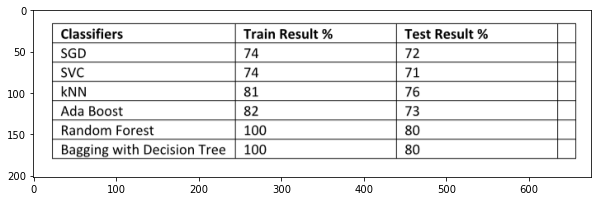

In [42]:
image=plt.imread('ClassifiersPlot.PNG')
plt.figure(figsize=(10,10))
plt.imshow(image)

In [ ]:
# Conclusion 
#From observing we can see that the model clearly does not have underfitting as the Train Result % > Test Result % for all classifiers. 
#We can consider SGD and SVC classifiers as their overfitting rates are very small (3% to 2%) which shows that the model performs well when trained using SGD 
#and SVC classifiers